# 30915_전종현_0909_1
### 수행평가 연습

In [1]:
%%html

<style> table {float:left} </style>

|함수|기능|
|----|----|
|head()|앞부분 출력|
|tail()|뒷부분 출력|
|shape()|행, 열 개수 출력|
|info()|변수 속성 출력|
|describe()|요약 통계량 출력|

In [4]:
import pandas as pd
import numpy as np

In [22]:
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [5]:
mpg = pd.read_csv("mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
mpg['total'] = (mpg['cty']+mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:ylabel='Frequency'>

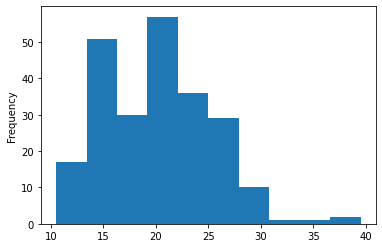

In [8]:
mpg['total'].plot.hist()

In [9]:
mpg['test'] = np.where(mpg['total']>=20,'pass','fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


In [11]:
mpg['test'].value_counts()

pass    128
fail    106
Name: test, dtype: int64

<AxesSubplot:>

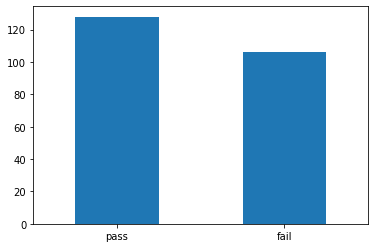

In [13]:
count_test = mpg['test'].value_counts()
count_test.plot.bar(rot=0)

In [23]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
                    mean = (exam['math'] + exam['english'] + exam['science']) / 3)  

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [24]:
exam.agg(mean_math = ("math",'mean'))

,math
mean_math,57.45


In [26]:
exam.groupby("nclass") \
    .agg(mean_math = ("math",'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [31]:
exam.drop(columns='id').groupby("nclass").mean()

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [36]:
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                                           'test' : [60, 80, 70, 90, 85]})

group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                                           'test' : [70, 83, 65, 95, 80]})

In [43]:
group_all = pd.concat([group_a,group_b])
group_all.set_index("id")

,test
id,
1,60
2,80
3,70
4,90
5,85
6,70
7,83
8,65
9,95


In [44]:
mpg.groupby(['manufacturer','drv']) \
        .agg(mean_cty = ('cty','mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [45]:
mpg.query('manufacturer == "chevrolet"') \
       .groupby(['drv']) \
       .agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


In [46]:
mpg.query('category == "suv"') \
       .assign(total = (mpg['hwy']+mpg['cty'])/2) \
       .groupby('manufacturer') \
       .agg(mean_tot = ('total', 'mean')) \
       .sort_values('mean_tot', ascending = False) \
       .head()

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [58]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [57]:
exam.groupby('nclass') \
        .agg(eng_mean = ("english",'mean'),
            eng_min = ("english",'min'),
            eng_std = ("english","std"))

,eng_mean,eng_min,eng_std
nclass,,,
1,94.75,86,5.852350
2,84.25,78,6.130525
3,86.50,65,15.588457
4,84.75,56,19.855730
5,74.25,68,7.500000


<AxesSubplot:xlabel='nclass'>

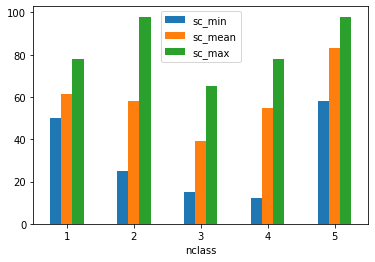

In [64]:
exam.groupby("nclass")\
    .agg(sc_min = ("science",'min'),
        sc_mean = ("science",'mean'),
        sc_max = ("science",'max'))\
    .plot.bar(rot=0)

### 추출은 query()
### 별, 분리는 .groupby()

<AxesSubplot:xlabel='manufacturer,year'>

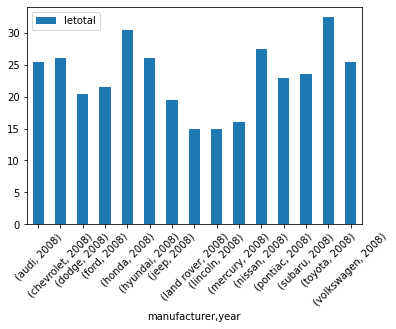

In [102]:
mpg.groupby(['manufacturer','year'])\
    .agg(letotal = ("total",'max')).query("year==2008")\
    .plot.bar(rot=45)